In [1]:
# intitial imports
from fastbook import *
from fastai.vision.widgets import *


In [8]:
doc(get_image_files)

In [2]:
art = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=69),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [3]:
dls = art.dataloaders('art')

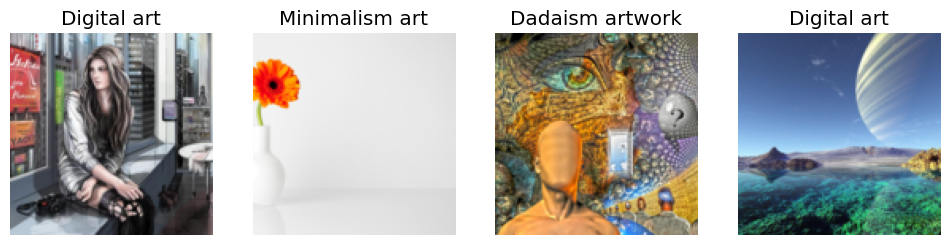

In [4]:
dls.valid.show_batch(max_n=4, nrows=1)

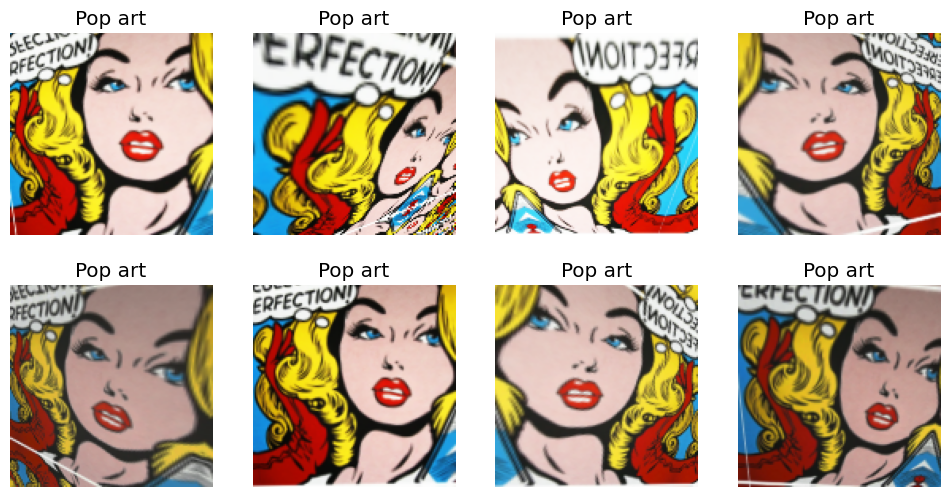

In [5]:
art = art.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = art.dataloaders('art')
dls.train.show_batch(max_n=8, nrows=2, unique=True)

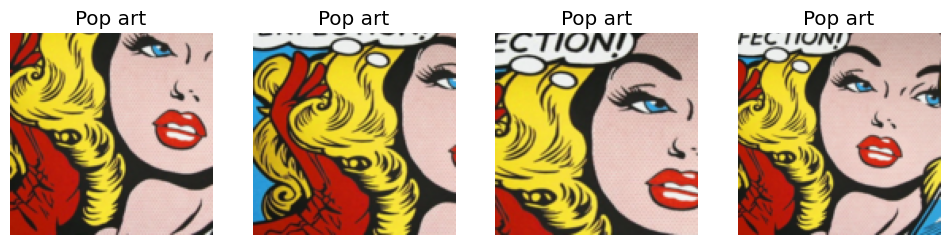

In [8]:
art = art.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = art.dataloaders('art')
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [9]:
art = art.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    )
dls = art.dataloaders('art')

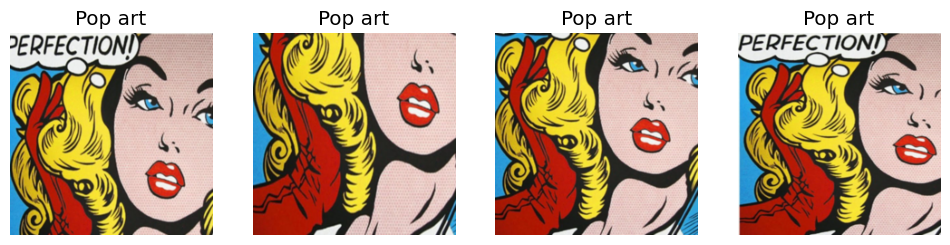

In [10]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/home/kalymaan/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.352342,0.653043,0.197080,05:03


/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-pack

epoch,train_loss,valid_loss,error_rate,time
0,0.697925,0.249194,0.063504,06:57
1,0.362325,0.181897,0.038686,06:55
2,0.201899,0.163089,0.043066,07:05
3,0.122508,0.129627,0.039416,06:57
4,0.087427,0.129242,0.043066,06:55


/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-pack

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/kalymaan/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


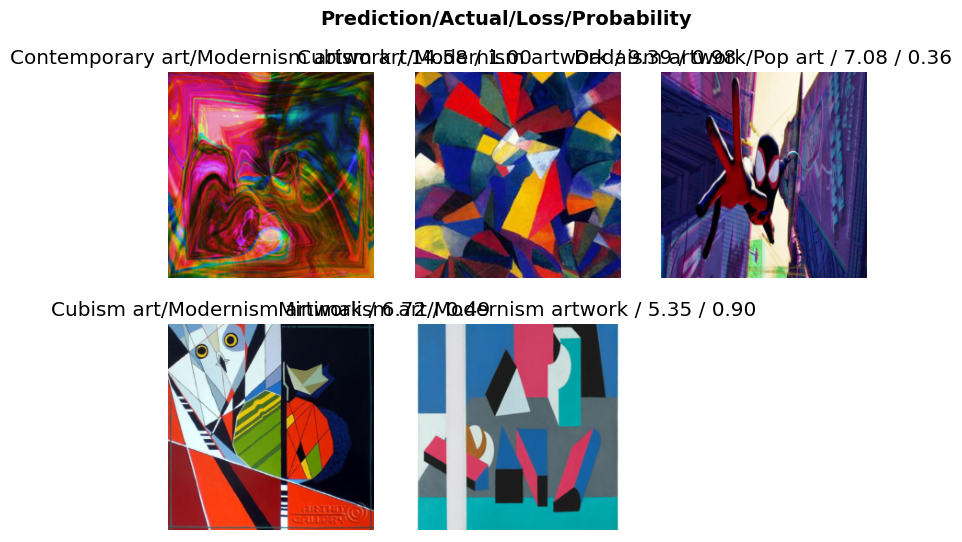

In [16]:
interp.plot_top_losses(5)

In [14]:
learn.export()